In [1]:
from advectionGPdatasets.roundhill import RoundHill,RoundHillModel
from advectionGP.kernels import EQ
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(precision=1,suppress=True)

In [3]:
import pickle
#to erase the cache..
#!rm roundhillmodel_cache.pkl
try:
    rhm = pickle.load(open('roundhillmodel_cache.pkl','rb'))
    results = rhm.results
except FileNotFoundError:
    k = EQ(np.array([200,9,9]), 200)
    rhm = RoundHillModel(N_feat=2000,Nparticles=15,k=k,)
    results = rhm.compute(15)
    pickle.dump(rhm,open('roundhillmodel_cache.pkl','wb'))

 /home/mike/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:885: RuntimeWarning:invalid value encountered in sqrt
 /home/mike/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:885: RuntimeWarning:invalid value encountered in sqrt


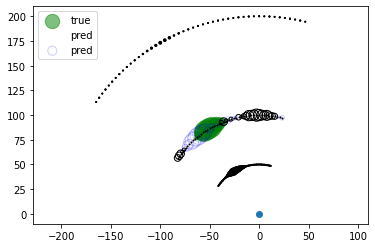

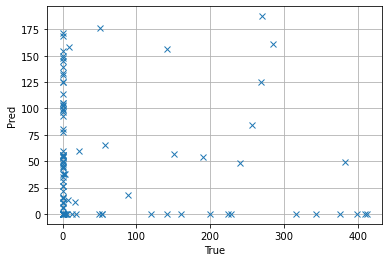

In [27]:
plt.figure()
rhm.plot_test(timepoint=30)
plt.figure()
rhm.scatter_plot_test()

In [7]:
import GPy
k = GPy.kern.RBF(3,ARD=True,lengthscale=30)
m = GPy.models.GPRegression(rhm.X,rhm.Y[:,None],k)
m.Gaussian_noise = 2.0
#m.optimize()
m.kern.lengthscale

 /home/mike/Documents/Research/GPy/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 3 then the given X dimension 4. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


index,GP_regression.rbf.lengthscale,constraints,priors
[0],30.0,+ve,
[1],30.0,+ve,
[2],30.0,+ve,


 /home/mike/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:885: RuntimeWarning:invalid value encountered in sqrt


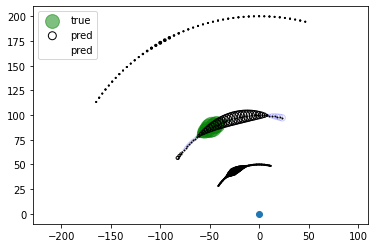

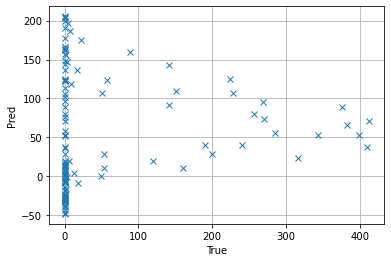

In [10]:
GPpreds, GPvars = m.predict(rhm.Xtest)
plt.figure()
rhm.plot_test(GPpreds,180)
plt.figure()
rhm.scatter_plot_test(GPpreds)

In [11]:
def MAE(a):
    return np.mean(np.abs(a))
def RMSE(a):
    return np.sqrt(np.mean(a**2))
def MSE(a):
    return np.mean(a**2)

print(" Time     GP   Adjoint")
for t in [30,180,600]:
    keep = rhm.Xtest[:,1]==t
    thresholdGPpreds = GPpreds.copy()
    thresholdGPpreds[thresholdGPpreds<0]=0
    thresholdpreds = rhm.results['testconc']['mean'].copy()
    thresholdpreds[thresholdpreds<0]=0
    print("%5d: %6.0f %6.0f" % (t,MSE(rhm.Ytest[keep]-thresholdGPpreds[keep,0]),MSE(rhm.Ytest[keep]-thresholdpreds[keep])))

 Time     GP   Adjoint
   30:  21385  21495
  180:  12968  11126
  600:   8490   9132


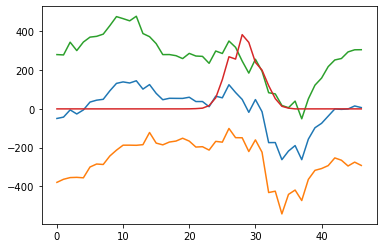

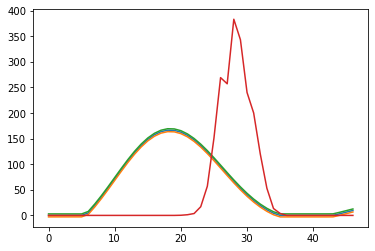

In [15]:
keep = rhm.Xtest[:,1]==180
plt.plot(results['testconc']['mean'][keep]);
plt.plot(results['testconc']['mean'][keep]-2*np.sqrt(results['testconc']['var'][keep]));
plt.plot(results['testconc']['mean'][keep]+2*np.sqrt(results['testconc']['var'][keep]));
plt.plot(rhm.Ytest[keep])
plt.figure()
plt.plot(thresholdGPpreds[keep])
plt.plot(thresholdGPpreds[keep]-2*np.sqrt(GPvars[keep]))
plt.plot(thresholdGPpreds[keep]+2*np.sqrt(GPvars[keep]))
plt.plot(rhm.Ytest[keep])

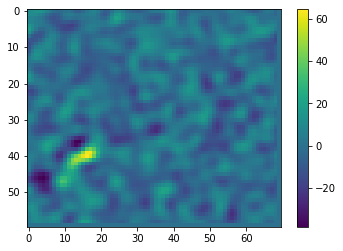

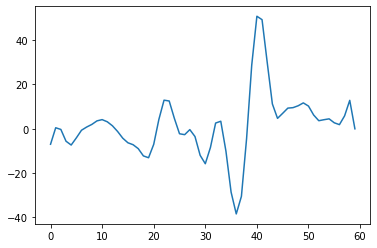

In [26]:
plt.imshow(results['sources']['mean'][30,:,:])
plt.colorbar()
plt.figure()
plt.plot(results['sources']['mean'][30,:,14])
